In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
pieman_db = niidb.FMriActivationsDb('data/new_pieman.db', mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(pieman_db.all(), mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

09/26/2018 14:19:46 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-19-task-intact2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
09/26/2018 14:19:50 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-70-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
09/26/2018 14:19:55 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-72-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
09/26/2018 14:20:00 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
09/26/2018 14:20:04 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
09/26

In [6]:
dtfa.normalize_activations()

[tensor(12.2934),
 tensor(9.2157),
 tensor(12.6739),
 tensor(9.9904),
 tensor(7.0961),
 tensor(9.9361),
 tensor(10.2605),
 tensor(10.2784),
 tensor(8.7215),
 tensor(7.7147),
 tensor(10.8663),
 tensor(10.3052),
 tensor(11.3599),
 tensor(11.0267),
 tensor(12.6463),
 tensor(7.3090),
 tensor(12.5919),
 tensor(8.4995),
 tensor(7.3259),
 tensor(12.3034),
 tensor(10.2214),
 tensor(9.0622),
 tensor(10.5355),
 tensor(6.8231),
 tensor(13.3428),
 tensor(11.3538),
 tensor(8.8231),
 tensor(9.5122),
 tensor(8.5310),
 tensor(5.8815),
 tensor(10.5644),
 tensor(9.7792),
 tensor(9.2753),
 tensor(10.2214),
 tensor(15.1439),
 tensor(8.0696),
 tensor(7.7713),
 tensor(9.9900),
 tensor(7.6350),
 tensor(8.9078),
 tensor(12.6764),
 tensor(7.4619),
 tensor(15.6173),
 tensor(12.5026),
 tensor(10.3105),
 tensor(10.8251),
 tensor(8.2151),
 tensor(11.1989),
 tensor(11.2216),
 tensor(13.6012),
 tensor(10.7603),
 tensor(10.0913),
 tensor(9.5122),
 tensor(8.6011),
 tensor(6.8498),
 tensor(8.6109),
 tensor(8.9906),
 te

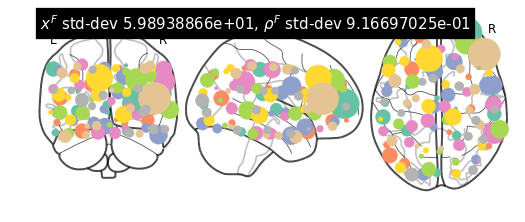

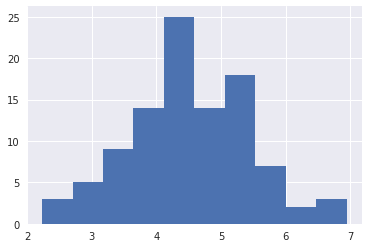

(<nilearn.plotting.displays.OrthoProjector at 0x7f59d1c11438>,
 tensor([[ -1.0872,  -9.8072,  -2.7263],
         [ -1.3888, -88.5668,   5.1218],
         [-32.9827, -44.0095,  -1.4816],
         [ 59.1019, -26.6245,  17.0013],
         [-23.1901,  30.6994,   7.6092],
         [ 30.3794,  59.0538,   6.8610],
         [ 19.4074, -49.2976, -22.8617],
         [-31.4656,   2.6764,  20.9461],
         [-11.0480, -38.1676,  25.6363],
         [-57.8932, -29.8470,  42.7520],
         [ 18.6613, -21.2748,  46.4801],
         [-55.7060, -15.3828, -24.4142],
         [ 58.3473, -12.4935,   1.0689],
         [ 53.4050, -60.3853,   5.0882],
         [ 32.0500,  12.3698,  21.6710],
         [-18.6407,  54.8991,  26.4701],
         [ 41.4370,  46.3377, -11.1649],
         [  8.4270,  61.3356, -10.5817],
         [-35.3881, -78.6060,  37.2183],
         [-53.9870, -59.0498, -13.4893],
         [ 11.8772, -45.8368,  44.1390],
         [-27.6242,  20.5921, -22.6018],
         [ 34.8040, -20.9394,  22.2

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=8, patience=100)

09/26/2018 14:30:35 [Epoch 1] (33346ms) Posterior free-energy 3.79805133e+09 = KL from prior 2.58639194e+06 - log-likelihood -3.79546515e+09
09/26/2018 14:30:35 Saving checkpoint...
09/26/2018 14:31:08 [Epoch 2] (32105ms) Posterior free-energy 3.55350989e+09 = KL from prior 2.36599922e+06 - log-likelihood -3.55114368e+09
09/26/2018 14:31:41 [Epoch 3] (33045ms) Posterior free-energy 3.53849318e+09 = KL from prior 2.63167884e+06 - log-likelihood -3.53586131e+09
09/26/2018 14:32:14 [Epoch 4] (32635ms) Posterior free-energy 3.53206067e+09 = KL from prior 2.86560222e+06 - log-likelihood -3.52919526e+09
09/26/2018 14:32:47 [Epoch 5] (33406ms) Posterior free-energy 3.52713882e+09 = KL from prior 3.10688362e+06 - log-likelihood -3.52403200e+09
09/26/2018 14:33:20 [Epoch 6] (32729ms) Posterior free-energy 3.52088730e+09 = KL from prior 3.39235100e+06 - log-likelihood -3.51749498e+09
09/26/2018 14:33:53 [Epoch 7] (32773ms) Posterior free-energy 3.50572954e+09 = KL from prior 3.79015912e+06 - log

Epoch   393: reducing learning rate of group 0 to 5.0000e-02.


09/26/2018 18:06:30 [Epoch 395] (31667ms) Posterior free-energy 2.71997389e+09 = KL from prior 1.27270488e+07 - log-likelihood -2.70724666e+09
09/26/2018 18:07:02 [Epoch 396] (31633ms) Posterior free-energy 2.66229427e+09 = KL from prior 1.27061602e+07 - log-likelihood -2.64958794e+09
09/26/2018 18:07:33 [Epoch 397] (31712ms) Posterior free-energy 2.65080653e+09 = KL from prior 1.26679789e+07 - log-likelihood -2.63813853e+09
09/26/2018 18:08:05 [Epoch 398] (31693ms) Posterior free-energy 2.64636134e+09 = KL from prior 1.26359291e+07 - log-likelihood -2.63372531e+09
09/26/2018 18:08:37 [Epoch 399] (31642ms) Posterior free-energy 2.64401459e+09 = KL from prior 1.26132658e+07 - log-likelihood -2.63140141e+09
09/26/2018 18:09:08 [Epoch 400] (31622ms) Posterior free-energy 2.64489600e+09 = KL from prior 1.25955170e+07 - log-likelihood -2.63230048e+09
09/26/2018 18:09:40 [Epoch 401] (31720ms) Posterior free-energy 2.64806938e+09 = KL from prior 1.25828719e+07 - log-likelihood -2.63548646e+09

Epoch   499: reducing learning rate of group 0 to 2.5000e-02.


09/26/2018 19:02:24 [Epoch 501] (31599ms) Posterior free-energy 2.67956275e+09 = KL from prior 1.24790214e+07 - log-likelihood -2.66708374e+09
09/26/2018 19:02:24 Saving checkpoint...
09/26/2018 19:02:55 [Epoch 502] (31567ms) Posterior free-energy 2.64605235e+09 = KL from prior 1.24831154e+07 - log-likelihood -2.63356918e+09
09/26/2018 19:03:27 [Epoch 503] (31535ms) Posterior free-energy 2.63369242e+09 = KL from prior 1.24750170e+07 - log-likelihood -2.62121728e+09
09/26/2018 19:03:58 [Epoch 504] (31549ms) Posterior free-energy 2.62901478e+09 = KL from prior 1.24643900e+07 - log-likelihood -2.61655034e+09
09/26/2018 19:04:30 [Epoch 505] (31557ms) Posterior free-energy 2.62689152e+09 = KL from prior 1.24555294e+07 - log-likelihood -2.61443619e+09
09/26/2018 19:05:02 [Epoch 506] (31566ms) Posterior free-energy 2.62552627e+09 = KL from prior 1.24491216e+07 - log-likelihood -2.61307750e+09
09/26/2018 19:05:33 [Epoch 507] (31489ms) Posterior free-energy 2.62441139e+09 = KL from prior 1.2442

Epoch   620: reducing learning rate of group 0 to 1.2500e-02.


09/26/2018 20:06:09 [Epoch 622] (31610ms) Posterior free-energy 2.63242445e+09 = KL from prior 1.25706128e+07 - log-likelihood -2.61985376e+09
09/26/2018 20:06:40 [Epoch 623] (31677ms) Posterior free-energy 2.61561754e+09 = KL from prior 1.25721220e+07 - log-likelihood -2.60304528e+09
09/26/2018 20:07:12 [Epoch 624] (31632ms) Posterior free-energy 2.61280794e+09 = KL from prior 1.25703729e+07 - log-likelihood -2.60023757e+09
09/26/2018 20:07:44 [Epoch 625] (31595ms) Posterior free-energy 2.61222118e+09 = KL from prior 1.25709468e+07 - log-likelihood -2.59965034e+09
09/26/2018 20:08:15 [Epoch 626] (31571ms) Posterior free-energy 2.61193958e+09 = KL from prior 1.25704682e+07 - log-likelihood -2.59936918e+09
09/26/2018 20:08:47 [Epoch 627] (31632ms) Posterior free-energy 2.61171994e+09 = KL from prior 1.25695875e+07 - log-likelihood -2.59915021e+09
09/26/2018 20:09:18 [Epoch 628] (31607ms) Posterior free-energy 2.61152026e+09 = KL from prior 1.25735598e+07 - log-likelihood -2.59894688e+09

Epoch   764: reducing learning rate of group 0 to 6.2500e-03.


09/26/2018 21:22:04 [Epoch 766] (31624ms) Posterior free-energy 2.60989363e+09 = KL from prior 1.28192688e+07 - log-likelihood -2.59707440e+09
09/26/2018 21:22:36 [Epoch 767] (31724ms) Posterior free-energy 2.60729446e+09 = KL from prior 1.28192525e+07 - log-likelihood -2.59447536e+09
09/26/2018 21:23:08 [Epoch 768] (31646ms) Posterior free-energy 2.60637901e+09 = KL from prior 1.28192772e+07 - log-likelihood -2.59355958e+09
09/26/2018 21:23:39 [Epoch 769] (31663ms) Posterior free-energy 2.60615706e+09 = KL from prior 1.28191788e+07 - log-likelihood -2.59333827e+09
09/26/2018 21:24:11 [Epoch 770] (31681ms) Posterior free-energy 2.60607334e+09 = KL from prior 1.28233878e+07 - log-likelihood -2.59325011e+09
09/26/2018 21:24:43 [Epoch 771] (31675ms) Posterior free-energy 2.60599834e+09 = KL from prior 1.28220588e+07 - log-likelihood -2.59317632e+09
09/26/2018 21:25:14 [Epoch 772] (31612ms) Posterior free-energy 2.60594534e+09 = KL from prior 1.28231322e+07 - log-likelihood -2.59312221e+09

Epoch  1020: reducing learning rate of group 0 to 3.1250e-03.


09/26/2018 23:37:02 [Epoch 1022] (31682ms) Posterior free-energy 2.60572902e+09 = KL from prior 1.30856265e+07 - log-likelihood -2.59264304e+09
09/26/2018 23:37:33 [Epoch 1023] (31538ms) Posterior free-energy 2.60525926e+09 = KL from prior 1.30863478e+07 - log-likelihood -2.59217296e+09
09/26/2018 23:38:05 [Epoch 1024] (31568ms) Posterior free-energy 2.60451507e+09 = KL from prior 1.30863475e+07 - log-likelihood -2.59142874e+09
09/26/2018 23:38:36 [Epoch 1025] (31583ms) Posterior free-energy 2.60396365e+09 = KL from prior 1.30860935e+07 - log-likelihood -2.59087760e+09
09/26/2018 23:39:08 [Epoch 1026] (31584ms) Posterior free-energy 2.60361011e+09 = KL from prior 1.30896190e+07 - log-likelihood -2.59052048e+09
09/26/2018 23:39:39 [Epoch 1027] (31542ms) Posterior free-energy 2.60341478e+09 = KL from prior 1.30898325e+07 - log-likelihood -2.59032496e+09
09/26/2018 23:40:11 [Epoch 1028] (31632ms) Posterior free-energy 2.60325606e+09 = KL from prior 1.30870508e+07 - log-likelihood -2.59016

Epoch  1392: reducing learning rate of group 0 to 1.5625e-03.


09/27/2018 02:52:57 [Epoch 1394] (31687ms) Posterior free-energy 2.60193715e+09 = KL from prior 1.32660305e+07 - log-likelihood -2.58867101e+09
09/27/2018 02:53:29 [Epoch 1395] (31612ms) Posterior free-energy 2.60186573e+09 = KL from prior 1.32674440e+07 - log-likelihood -2.58859830e+09
09/27/2018 02:54:01 [Epoch 1396] (31687ms) Posterior free-energy 2.60180966e+09 = KL from prior 1.32663195e+07 - log-likelihood -2.58854317e+09
09/27/2018 02:54:33 [Epoch 1397] (31788ms) Posterior free-energy 2.60177382e+09 = KL from prior 1.32654680e+07 - log-likelihood -2.58850819e+09
09/27/2018 02:55:04 [Epoch 1398] (31654ms) Posterior free-energy 2.60177715e+09 = KL from prior 1.32683762e+07 - log-likelihood -2.58850893e+09
09/27/2018 02:55:36 [Epoch 1399] (31639ms) Posterior free-energy 2.60175667e+09 = KL from prior 1.32683985e+07 - log-likelihood -2.58848842e+09
09/27/2018 02:56:08 [Epoch 1400] (31780ms) Posterior free-energy 2.60173594e+09 = KL from prior 1.32675418e+07 - log-likelihood -2.58846

Epoch  1525: reducing learning rate of group 0 to 7.8125e-04.


09/27/2018 04:03:03 [Epoch 1527] (31646ms) Posterior free-energy 2.60155597e+09 = KL from prior 1.32963818e+07 - log-likelihood -2.58825971e+09
09/27/2018 04:03:35 [Epoch 1528] (31699ms) Posterior free-energy 2.60153651e+09 = KL from prior 1.32958635e+07 - log-likelihood -2.58824054e+09
09/27/2018 04:04:06 [Epoch 1529] (31630ms) Posterior free-energy 2.60152141e+09 = KL from prior 1.32972162e+07 - log-likelihood -2.58822410e+09
09/27/2018 04:04:38 [Epoch 1530] (31645ms) Posterior free-energy 2.60150426e+09 = KL from prior 1.32969338e+07 - log-likelihood -2.58820720e+09
09/27/2018 04:05:10 [Epoch 1531] (31671ms) Posterior free-energy 2.60149606e+09 = KL from prior 1.32983942e+07 - log-likelihood -2.58819795e+09
09/27/2018 04:05:41 [Epoch 1532] (31699ms) Posterior free-energy 2.60148762e+09 = KL from prior 1.32987978e+07 - log-likelihood -2.58818886e+09
09/27/2018 04:06:13 [Epoch 1533] (31680ms) Posterior free-energy 2.60147942e+09 = KL from prior 1.33004045e+07 - log-likelihood -2.58817

Epoch  1693: reducing learning rate of group 0 to 3.9063e-04.


09/27/2018 05:31:38 [Epoch 1695] (31624ms) Posterior free-energy 2.60135296e+09 = KL from prior 1.33164342e+07 - log-likelihood -2.58803654e+09
09/27/2018 05:32:09 [Epoch 1696] (31567ms) Posterior free-energy 2.60135168e+09 = KL from prior 1.33163655e+07 - log-likelihood -2.58803555e+09
09/27/2018 05:32:41 [Epoch 1697] (31626ms) Posterior free-energy 2.60135014e+09 = KL from prior 1.33167140e+07 - log-likelihood -2.58803341e+09
09/27/2018 05:33:13 [Epoch 1698] (31603ms) Posterior free-energy 2.60134144e+09 = KL from prior 1.33152402e+07 - log-likelihood -2.58802646e+09
09/27/2018 05:33:44 [Epoch 1699] (31598ms) Posterior free-energy 2.60134093e+09 = KL from prior 1.33154815e+07 - log-likelihood -2.58802544e+09
09/27/2018 05:34:16 [Epoch 1700] (31577ms) Posterior free-energy 2.60133862e+09 = KL from prior 1.33171965e+07 - log-likelihood -2.58802131e+09
09/27/2018 05:34:47 [Epoch 1701] (31604ms) Posterior free-energy 2.60133658e+09 = KL from prior 1.33162570e+07 - log-likelihood -2.58802

Epoch  1794: reducing learning rate of group 0 to 1.9531e-04.


09/27/2018 06:24:52 [Epoch 1796] (31552ms) Posterior free-energy 2.60128666e+09 = KL from prior 1.33199068e+07 - log-likelihood -2.58796707e+09
09/27/2018 06:25:23 [Epoch 1797] (31636ms) Posterior free-energy 2.60128000e+09 = KL from prior 1.33232040e+07 - log-likelihood -2.58795664e+09
09/27/2018 06:25:55 [Epoch 1798] (31710ms) Posterior free-energy 2.60127514e+09 = KL from prior 1.33248338e+07 - log-likelihood -2.58795037e+09
09/27/2018 06:26:26 [Epoch 1799] (31552ms) Posterior free-energy 2.60128307e+09 = KL from prior 1.33221265e+07 - log-likelihood -2.58796102e+09
09/27/2018 06:26:58 [Epoch 1800] (31553ms) Posterior free-energy 2.60127258e+09 = KL from prior 1.33224262e+07 - log-likelihood -2.58795018e+09
09/27/2018 06:27:30 [Epoch 1801] (31553ms) Posterior free-energy 2.60127565e+09 = KL from prior 1.33222518e+07 - log-likelihood -2.58795344e+09
09/27/2018 06:27:30 Saving checkpoint...
09/27/2018 06:28:01 [Epoch 1802] (31660ms) Posterior free-energy 2.60127821e+09 = KL from prior

Epoch  1895: reducing learning rate of group 0 to 9.7656e-05.


09/27/2018 07:18:04 [Epoch 1897] (31610ms) Posterior free-energy 2.60125645e+09 = KL from prior 1.33253258e+07 - log-likelihood -2.58793094e+09
09/27/2018 07:18:35 [Epoch 1898] (31604ms) Posterior free-energy 2.60125056e+09 = KL from prior 1.33249292e+07 - log-likelihood -2.58792557e+09
09/27/2018 07:19:07 [Epoch 1899] (31628ms) Posterior free-energy 2.60124954e+09 = KL from prior 1.33227555e+07 - log-likelihood -2.58792688e+09
09/27/2018 07:19:38 [Epoch 1900] (31521ms) Posterior free-energy 2.60124826e+09 = KL from prior 1.33269558e+07 - log-likelihood -2.58792125e+09
09/27/2018 07:20:10 [Epoch 1901] (31511ms) Posterior free-energy 2.60124493e+09 = KL from prior 1.33275455e+07 - log-likelihood -2.58791744e+09
09/27/2018 07:20:10 Saving checkpoint...
09/27/2018 07:20:42 [Epoch 1902] (31512ms) Posterior free-energy 2.60124288e+09 = KL from prior 1.33257230e+07 - log-likelihood -2.58791722e+09
09/27/2018 07:21:13 [Epoch 1903] (31526ms) Posterior free-energy 2.60124493e+09 = KL from prior

Epoch  1996: reducing learning rate of group 0 to 4.8828e-05.


09/27/2018 08:11:14 [Epoch 1998] (31585ms) Posterior free-energy 2.60122675e+09 = KL from prior 1.33272848e+07 - log-likelihood -2.58789942e+09
09/27/2018 08:11:45 [Epoch 1999] (31611ms) Posterior free-energy 2.60123315e+09 = KL from prior 1.33256118e+07 - log-likelihood -2.58790739e+09
09/27/2018 08:12:17 [Epoch 2000] (31568ms) Posterior free-energy 2.60122829e+09 = KL from prior 1.33257450e+07 - log-likelihood -2.58790253e+09
09/27/2018 08:12:17 Saving checkpoint...


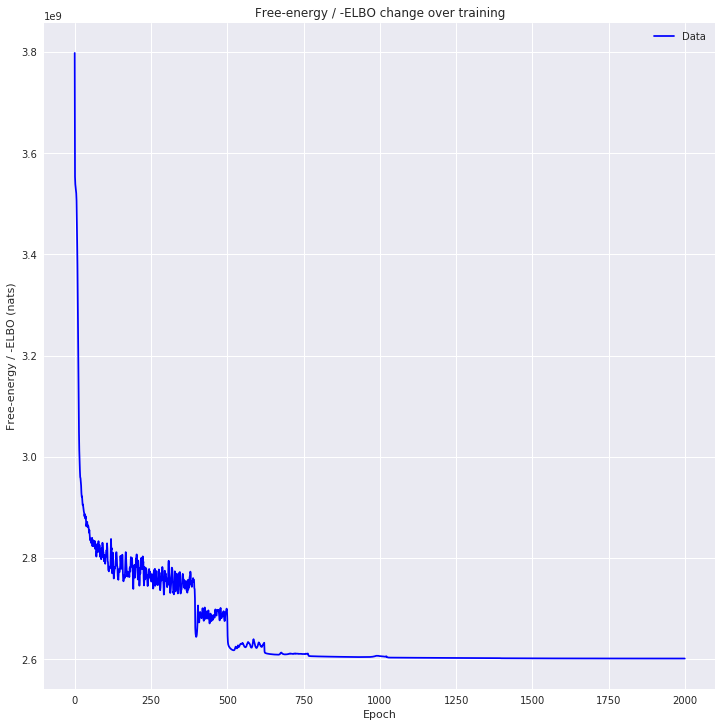

In [9]:
utils.plot_losses(losses)

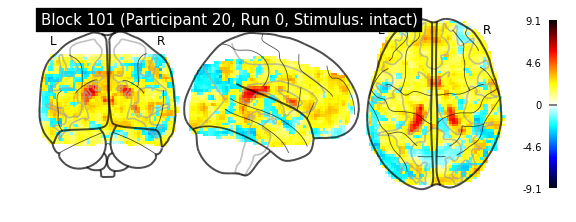

09/27/2018 08:12:34 Reconstruction Error (Frobenius Norm): 2.95617480e+03 out of 4.29069873e+03


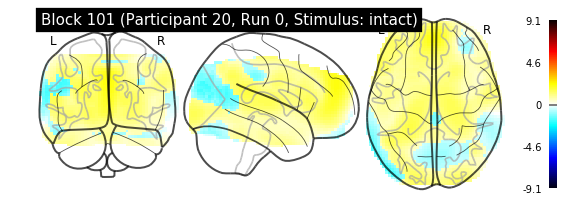

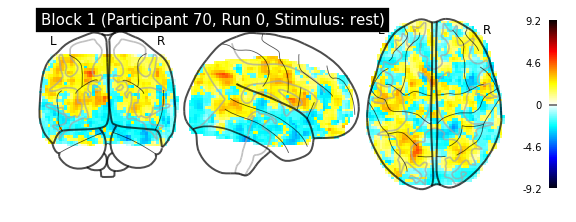

09/27/2018 08:12:57 Reconstruction Error (Frobenius Norm): 7.27860938e+03 out of 4.95447168e+03


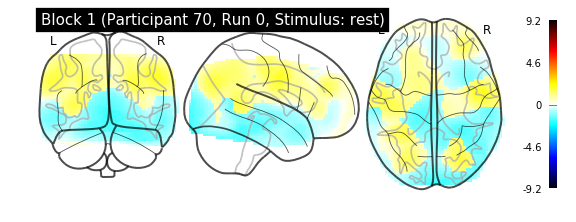

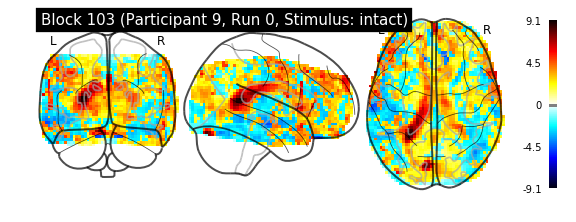

09/27/2018 08:13:15 Reconstruction Error (Frobenius Norm): 3.20477051e+03 out of 4.29069873e+03


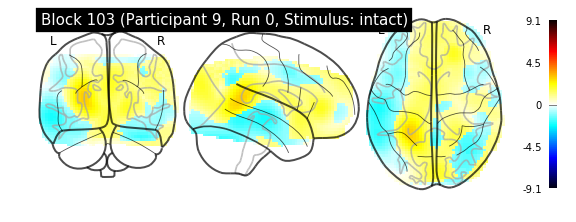

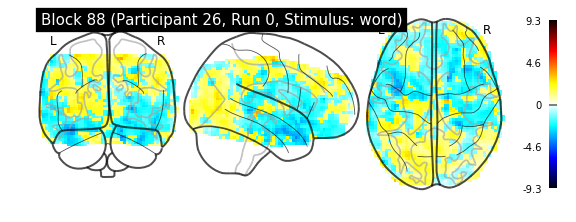

09/27/2018 08:13:33 Reconstruction Error (Frobenius Norm): 2.91722339e+03 out of 4.29069922e+03


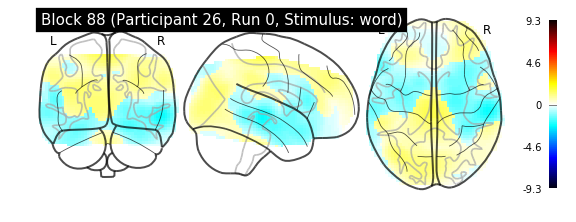

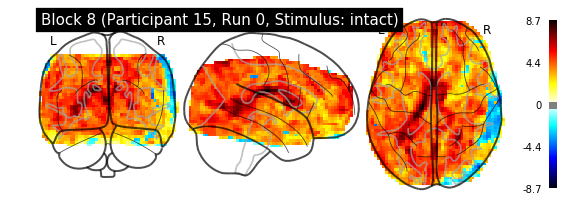

09/27/2018 08:13:50 Reconstruction Error (Frobenius Norm): 3.40467651e+03 out of 4.29069824e+03


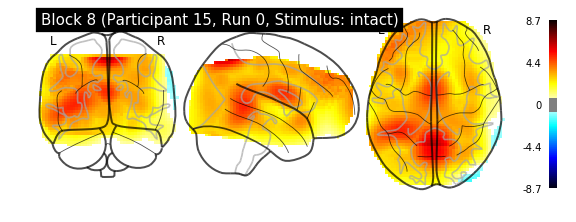

In [10]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [11]:
def task_labeler(b):
    return b.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


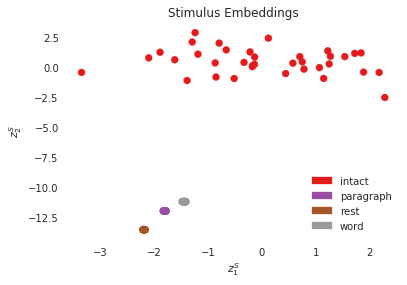

In [12]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [13]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


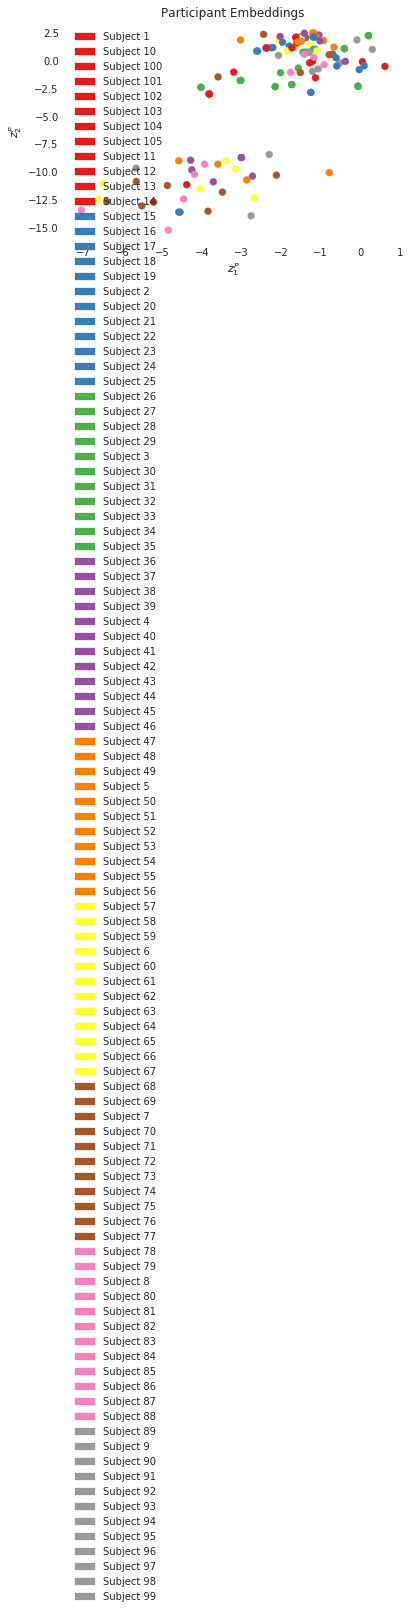

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

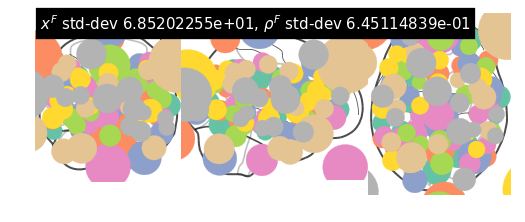

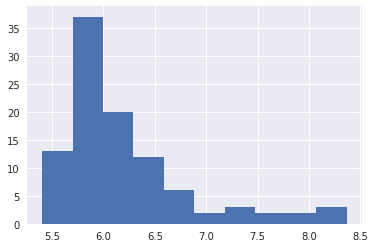

(<nilearn.plotting.displays.OrthoProjector at 0x7f568b57ff28>,
 tensor([[   1.9209,  -12.6189,   -6.3205],
         [  -1.5408,  -86.4576,    5.9157],
         [ -38.0090,  -44.5647,   -5.1413],
         [  60.6138,  -28.1572,   29.9803],
         [ -28.1642,   14.8872,   23.8287],
         [  33.8017,   51.7922,    0.6443],
         [  21.0148,  -70.5328,  -15.4268],
         [ -31.1713,  -14.5020,   35.3781],
         [   1.0221,  -30.9914,   35.6466],
         [ -59.3076,  -36.0037,   34.6919],
         [  32.6520,  -57.4149,   44.3569],
         [ -57.4077,  -24.1052,  -22.6287],
         [  63.7123,   -8.8211,    4.3365],
         [  50.4176,  -71.3938,   -0.3379],
         [  24.1242,   24.2912,   21.4976],
         [ -76.9741,   69.3793,   54.2499],
         [  52.7302,   29.7274,   -7.6746],
         [  -0.0228,  125.4878,  -10.2349],
         [ -36.5265,  -76.0975,   39.4680],
         [ -59.0523,  -52.7764,  -11.1842],
         [   1.4883,  -66.0514,   75.6332],
         [  -

In [15]:
dtfa.visualize_factor_embedding()